In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("anime.csv")

df.head()


,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)



Shape of dataset: (10000, 12)

Column names:
 ['anime_id', 'title', 'score', 'rank', 'popularity', 'members', 'synopsis', 'start_date', 'end_date', 'type', 'episodes', 'image_url']

Data types:
 anime_id        int64
title          object
score         float64
rank            int64
popularity      int64
members         int64
synopsis       object
start_date     object
end_date       object
type           object
episodes      float64
image_url      object
dtype: object


In [4]:
df.isnull().sum()


,0
anime_id,0
title,0
score,0
rank,0
popularity,0
members,0
synopsis,2
start_date,2
end_date,84
type,0


In [5]:
(df.isnull().sum() / len(df)) * 100


,0
anime_id,0.00
title,0.00
score,0.00
rank,0.00
popularity,0.00
members,0.00
synopsis,0.02
start_date,0.02
end_date,0.84
type,0.00


In [6]:
df.describe()


,anime_id,score,rank,popularity,members,episodes
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,9952.000000
mean,24129.128000,6.980589,5000.494000,6490.903700,1.075309e+05,15.702271
std,19948.188153,0.619406,2886.898727,4646.309341,2.733514e+05,41.865696
min,1.000000,6.050000,1.000000,1.000000,2.260000e+02,1.000000
25%,4055.500000,6.470000,2500.750000,2591.750000,4.270250e+03,1.000000
50%,21406.000000,6.900000,5000.500000,5564.500000,1.817900e+04,11.000000
75%,40028.750000,7.390000,7500.250000,9824.250000,8.469275e+04,13.000000
max,62863.000000,9.290000,10000.000000,22184.000000,4.262220e+06,1787.000000


In [7]:
df.skew(numeric_only=True)
df.kurtosis(numeric_only=True)


,0
anime_id,-1.340299
score,-0.225171
rank,-1.200006
popularity,-0.506004
members,48.566044
episodes,779.897857


In [9]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

df['year'] = df['start_date'].dt.year


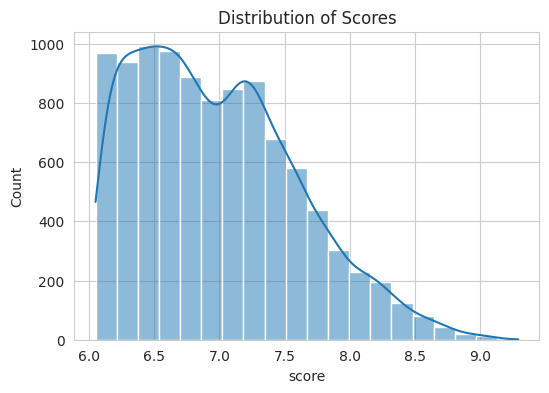

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['score'], bins=20, kde=True)
plt.title("Distribution of Scores")
plt.show()


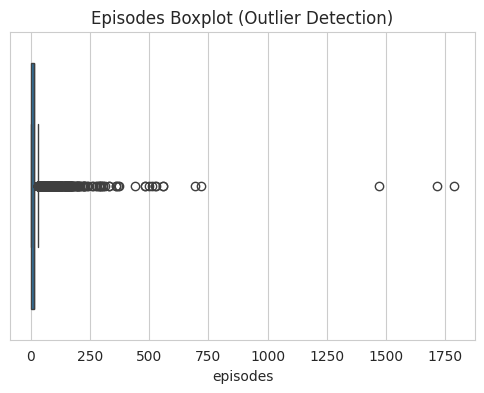

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['episodes'])
plt.title("Episodes Boxplot (Outlier Detection)")
plt.show()


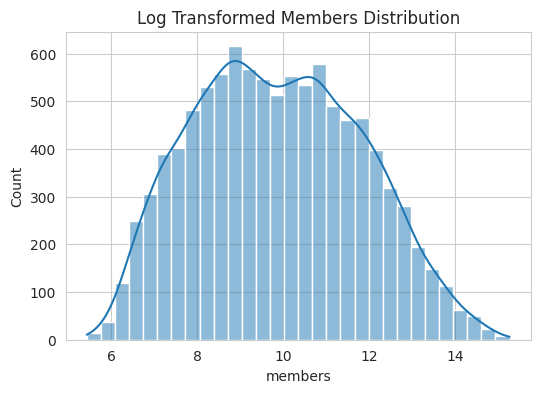

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df['members']), bins=30, kde=True)
plt.title("Log Transformed Members Distribution")
plt.show()


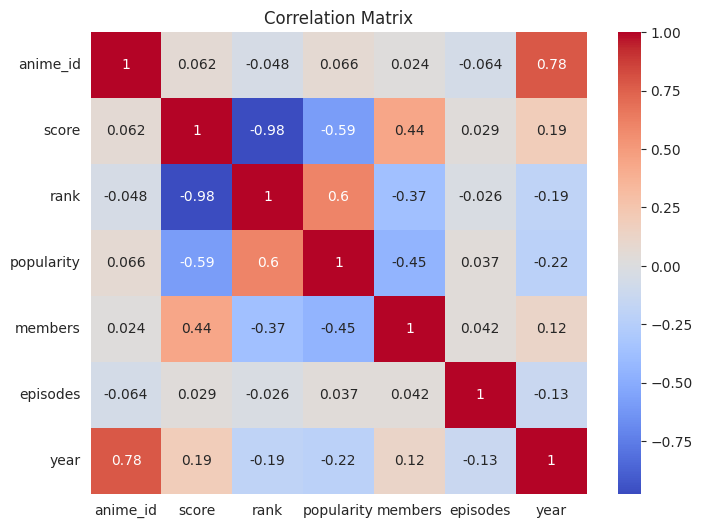

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


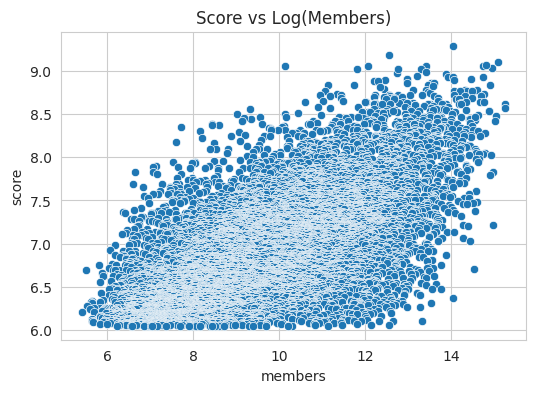

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=np.log1p(df['members']), y=df['score'])
plt.title("Score vs Log(Members)")
plt.show()


In [17]:
df.groupby('type')['score'].mean().sort_values(ascending=False)


,score
type,
TV,7.069148
Movie,7.067319
OVA,6.879889
ONA,6.876706
TV Special,6.788545
Special,6.788544


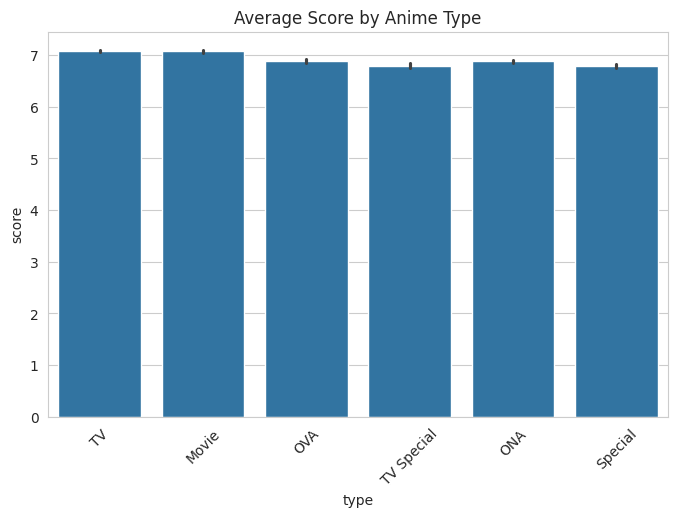

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='score', data=df)
plt.xticks(rotation=45)
plt.title("Average Score by Anime Type")
plt.show()


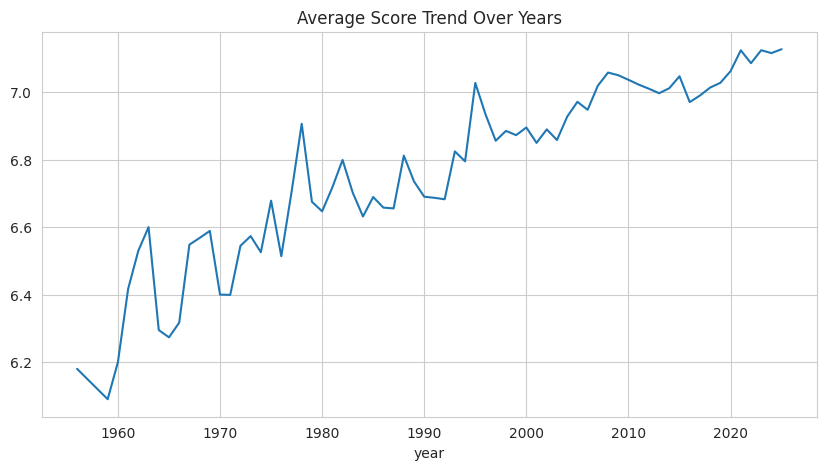

In [19]:
year_score = df.groupby('year')['score'].mean()

plt.figure(figsize=(10,5))
year_score.plot()
plt.title("Average Score Trend Over Years")
plt.show()


In [20]:
Q1 = df['episodes'].quantile(0.25)
Q3 = df['episodes'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

df[df['episodes'] > upper_limit]


,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url,year
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...,2015.0
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...,2011.0
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...,2011.0
10,5114,Fullmetal Alchemist: Brotherhood,9.10,3,3,3602700,After a horrific alchemy experiment goes wrong...,2009-01-01,2010-01-01,TV,64.0,https://cdn.myanimelist.net/images/anime/1208/...,2009.0
12,918,Gintama,8.93,19,146,1135547,Edo is a city that was home to the vigor and a...,2006-01-01,2010-01-01,TV,201.0,https://cdn.myanimelist.net/images/anime/10/73...,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,11245,Manga Nihonshi,6.06,9948,15654,817,Animated History of Japan.,1983-01-01,1984-01-01,TV,52.0,https://cdn.myanimelist.net/images/anime/2/586...,1983.0
9953,7106,Ougon Senshi Gold Lightan,6.06,9955,13156,1585,When a young boy called Hiro finds what appear...,1981-01-01,1982-01-01,TV,52.0,https://cdn.myanimelist.net/images/anime/10/60...,1981.0
9955,6523,Porong Porong Pororo,6.06,9957,14140,1211,The curious penguin Pororo is out exploring on...,2003-01-01,2004-01-01,TV,52.0,https://cdn.myanimelist.net/images/anime/11/66...,2003.0
9985,42082,Yi Shijie Zhongyao Pu,6.05,9985,14496,1111,After graduating from the University of Tradit...,2020-01-01,2020-01-01,ONA,40.0,https://cdn.myanimelist.net/images/anime/1789/...,2020.0


In [21]:
df.duplicated().sum()


np.int64(1)

In [23]:
df = df.drop_duplicates()


In [26]:
df['is_ongoing'] = df['end_date'].isnull().astype(int)
df['duration_years'] = (df['end_date'] - df['start_date']).dt.days / 365



In [27]:
df[['score','members','episodes','popularity']].skew()


,0
score,0.595206
members,5.927742
episodes,22.562599
popularity,0.611486


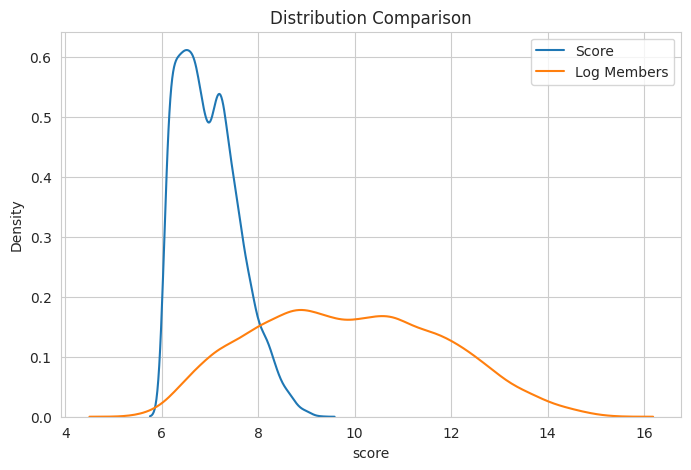

In [28]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['score'], label='Score')
sns.kdeplot(np.log1p(df['members']), label='Log Members')
plt.legend()
plt.title("Distribution Comparison")
plt.show()


In [30]:
Q1 = df['episodes'].quantile(0.25)
Q3 = df['episodes'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR

df['episodes_capped'] = np.where(df['episodes'] > upper, upper, df['episodes'])


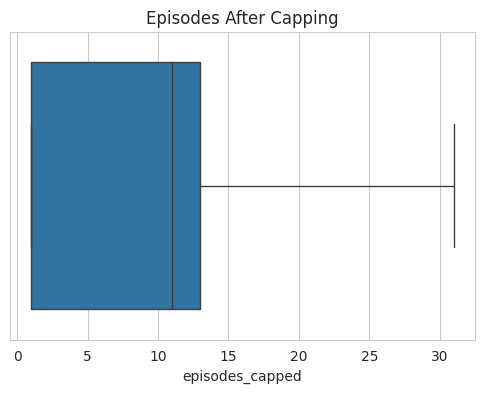

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['episodes_capped'])
plt.title("Episodes After Capping")
plt.show()


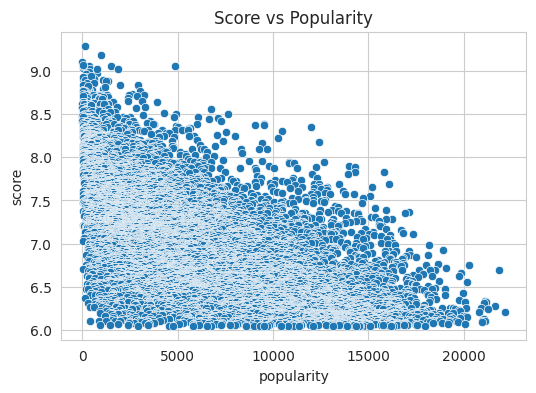

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['popularity'], y=df['score'])
plt.title("Score vs Popularity")
plt.show()


In [33]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['score'], df['members'])
print("Correlation:", corr)
print("P-value:", p)


Correlation: 0.43649720007339393
P-value: 0.0


In [34]:
df['type'].value_counts()


,count
type,
TV,4330
Movie,1723
ONA,1338
OVA,1172
Special,1003
TV Special,433


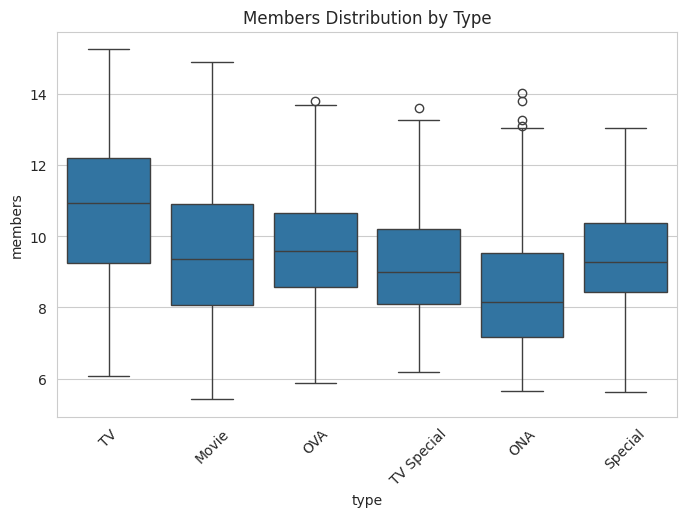

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y=np.log1p(df['members']), data=df)
plt.xticks(rotation=45)
plt.title("Members Distribution by Type")
plt.show()


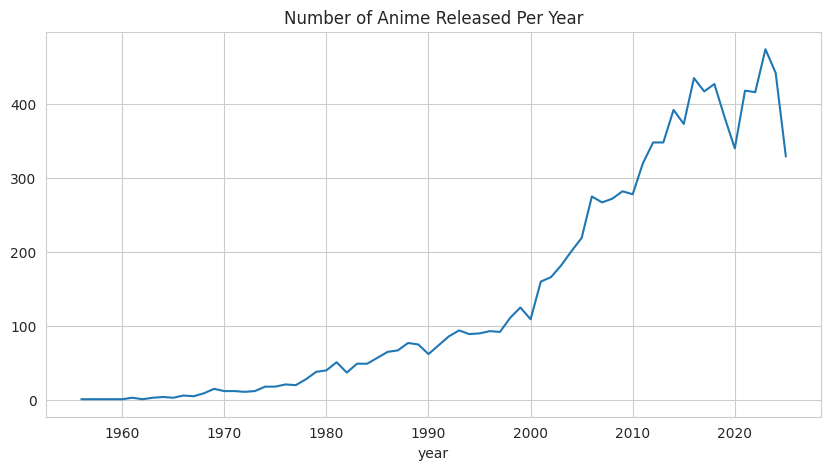

In [36]:
df['year'].value_counts().sort_index().plot(figsize=(10,5))
plt.title("Number of Anime Released Per Year")
plt.show()


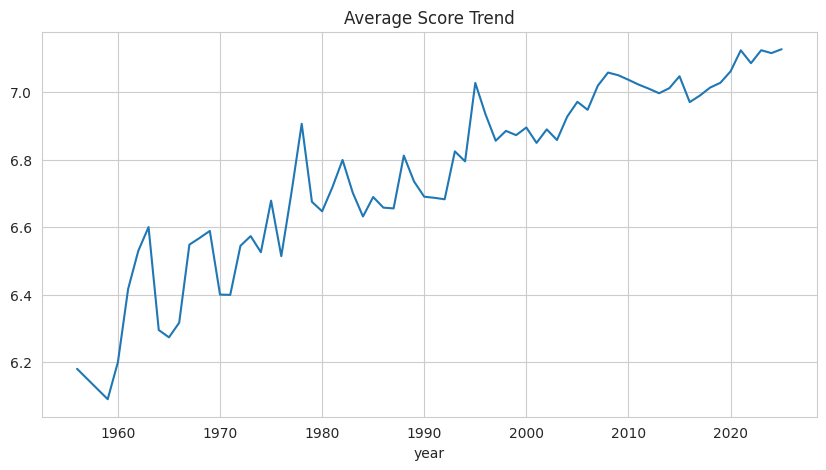

In [37]:
df.groupby('year')['score'].mean().plot(figsize=(10,5))
plt.title("Average Score Trend")
plt.show()


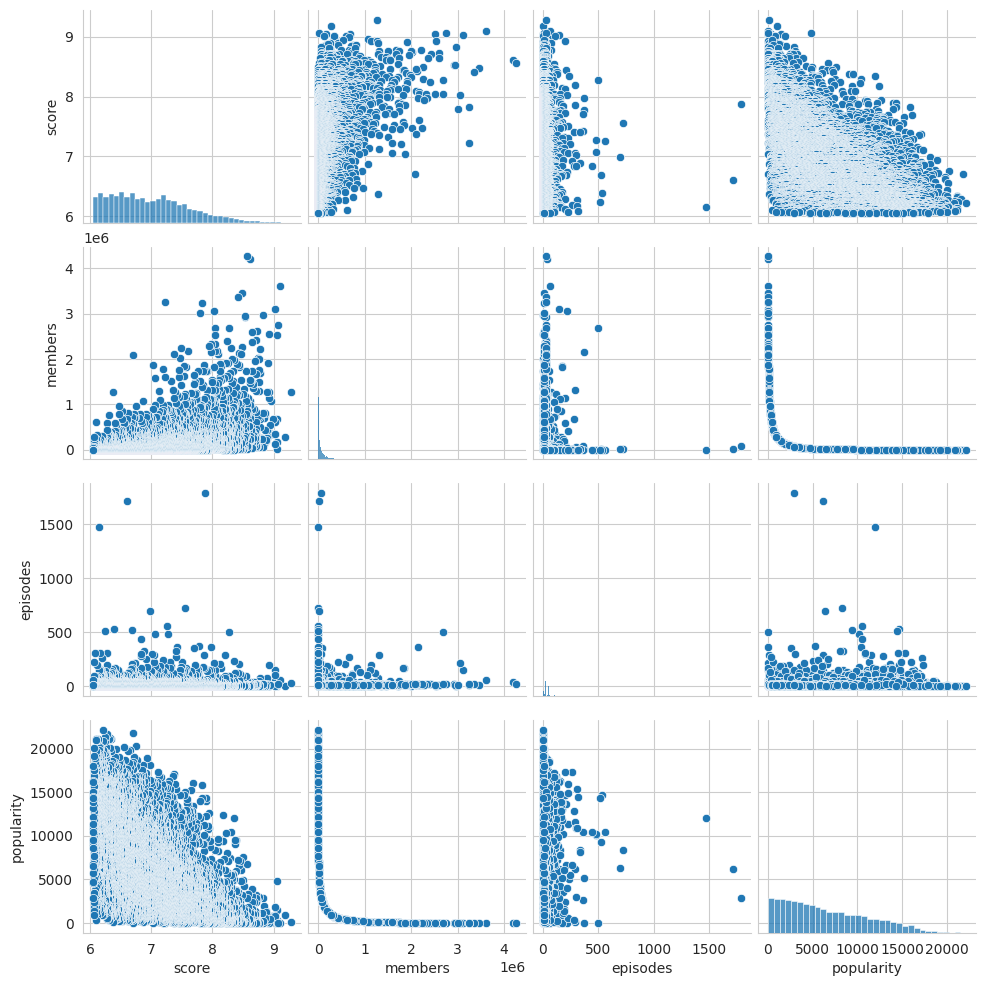

In [38]:
sns.pairplot(df[['score','members','episodes','popularity']])
plt.show()


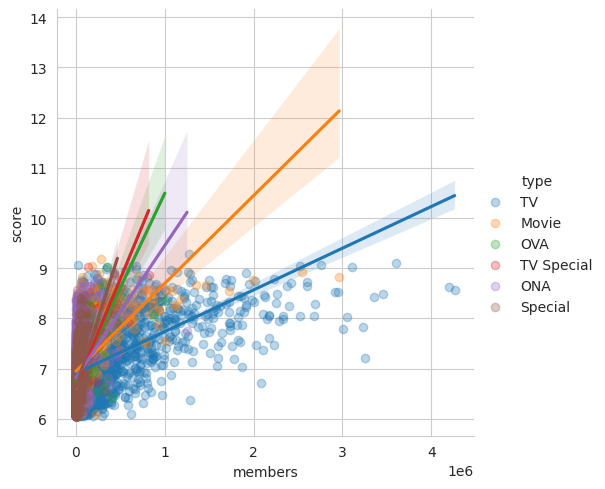

In [39]:
sns.lmplot(x='members', y='score', hue='type',
           data=df, scatter_kws={'alpha':0.3})
plt.show()


In [40]:
df.sort_values('score', ascending=False).head(10)


,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url,year,is_ongoing,duration_years,episodes_capped
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...,2023.0,0,1.000000,28.0
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...,2025.0,0,0.000000,1.0
10,5114,Fullmetal Alchemist: Brotherhood,9.10,3,3,3602700,After a horrific alchemy experiment goes wrong...,2009-01-01,2010-01-01,TV,64.0,https://cdn.myanimelist.net/images/anime/1208/...,2009.0,0,1.000000,31.0
28,9253,Steins;Gate,9.07,4,14,2755520,Eccentric scientist Rintarou Okabe has a never...,2011-01-01,2011-01-01,TV,24.0,https://cdn.myanimelist.net/images/anime/1935/...,2011.0,0,0.000000,24.0
19,61517,Kingdom 6th Season,9.06,5,4855,25549,"In ancient China, during the Warring States pe...",2025-01-01,NaT,TV,11.0,https://cdn.myanimelist.net/images/anime/1282/...,2025.0,1,NaN,11.0
6,39486,Gintama: The Final,9.05,7,1512,177094,Two years have passed following the Tendoshuu'...,2021-01-01,2021-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1245/...,2021.0,0,0.000000,1.0
7,38524,Shingeki no Kyojin Season 3 Part 2,9.05,6,21,2520232,Seeking to restore humanity's diminishing hope...,2019-01-01,2019-01-01,TV,10.0,https://cdn.myanimelist.net/images/anime/1517/...,2019.0,0,0.000000,10.0
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...,2015.0,0,1.000000,31.0
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...,2011.0,0,3.002740,31.0
16,820,Ginga Eiyuu Densetsu,9.02,10,753,353685,The 150-year-long stalemate between the two in...,1988-01-01,1997-01-01,OVA,110.0,https://cdn.myanimelist.net/images/anime/1976/...,1988.0,0,9.008219,31.0


In [41]:
df.sort_values('members', ascending=False).head(10)


,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url,year,is_ongoing,duration_years,episodes_capped
108,16498,Shingeki no Kyojin,8.57,115,1,4262220,"Centuries ago, mankind was slaughtered to near...",2013-01-01,2013-01-01,TV,25.0,https://cdn.myanimelist.net/images/anime/10/47...,2013.0,0,0.00000,25.0
97,1535,Death Note,8.62,97,2,4202843,"Brutal murders, petty thefts, and senseless vi...",2006-01-01,2007-01-01,TV,37.0,https://cdn.myanimelist.net/images/anime/1079/...,2006.0,0,1.00000,31.0
10,5114,Fullmetal Alchemist: Brotherhood,9.10,3,3,3602700,After a horrific alchemy experiment goes wrong...,2009-01-01,2010-01-01,TV,64.0,https://cdn.myanimelist.net/images/anime/1208/...,2009.0,0,1.00000,31.0
153,30276,One Punch Man,8.48,160,4,3455995,The seemingly unimpressive Saitama has a rathe...,2015-01-01,2015-01-01,TV,12.0,https://cdn.myanimelist.net/images/anime/12/76...,2015.0,0,0.00000,12.0
200,38000,Kimetsu no Yaiba,8.42,196,5,3356703,"Ever since the death of his father, the burden...",2019-01-01,2019-01-01,TV,26.0,https://cdn.myanimelist.net/images/anime/1286/...,2019.0,0,0.00000,26.0
3350,11757,Sword Art Online,7.22,3357,6,3249073,Ever since the release of the innovative Nerve...,2012-01-01,2012-01-01,TV,25.0,https://cdn.myanimelist.net/images/anime/11/39...,2012.0,0,0.00000,25.0
1023,31964,Boku no Hero Academia,7.83,1014,7,3236189,"The appearance of ""quirks,"" newly discovered s...",2016-01-01,2016-01-01,TV,13.0,https://cdn.myanimelist.net/images/anime/10/78...,2016.0,0,0.00000,13.0
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...,2011.0,0,3.00274,31.0
660,20,Naruto,8.02,667,9,3055340,"Twelve years ago, a colossal demon fox terrori...",2002-01-01,2007-01-01,TV,220.0,https://cdn.myanimelist.net/images/anime/1141/...,2002.0,0,5.00274,31.0
1114,22319,Tokyo Ghoul,7.79,1112,10,3002661,A sinister threat is invading Tokyo: flesh-eat...,2014-01-01,2014-01-01,TV,12.0,https://cdn.myanimelist.net/images/anime/1498/...,2014.0,0,0.00000,12.0
